##### Grading Feedback Cell

# IST 718: Big Data Analytics

- Professor:  Humayun Khan <hhkhan@syr.edu>
- Faculty Assistant: Rashika Pramod Singh <rsingh37@syr.edu>
- Faculty Assistant: Rohan Nitin Mahajan <rmahaj01@syr.edu>
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- There could be tests in some cells (i.e., `assert` and `np.testing.` statements). These tests (if present) are used to grade your answers. **However, the professor and FAs could use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before submitting your work, remember to check for run time errors with the following procedure:
`Kernel`$\rightarrow$`Restart and Run All`.  All runtime errors will result in a minimum penalty of half off.
- Data Bricks is the official class runtime environment so you should test your code on Data Bricks before submission.  If there is a runtime problem in the grading environment, we will try your code on Data Bricks before making a final grading decision.
- All plots shall include a title, and axis labels.  Unless stated otherwise, plots can be made using your favorite Python plotting package.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- Students may use toPandas() to print the head of data frames.
- We reserve the right to take points off for operations that are extremely inefficient.  This is a big data class and extremely inefficient operations make a big difference when scaling up to large data sets.
- Students are responsible for reading the usage comments and understanding how to properly use the utility functions (like get_training_filename()) provided in the assignments.  Runtime errors which result from incorrect usage of utility functions shall result in a  point reduction.  
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need.
- If you perform databricks specific operations, you MUST protect those operations in an if statement by calling the is_databricks() function provided in all homework assignments.  For example, if you use dbutils (databricks utilities), only run dbutils commands if is_databricks() returns true.  Runtime errors created in the grading environment by not protecting databricks specific commands in an if statement will result in a runtime error points deduction. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  Oftentimes there is a large disparity between the level of effort between students who are trying learn, and students who are trying to do the minimum possible to check off an assignment requirement.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who did put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- __Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.  Heavy weight operations that convert data to pandas or spark (like collect()) will result in a point reduction.__

In [ ]:
# Do not delete or change this cell

# grading import statements
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

# Question 1 (10 pts)
In the game of [roullete](https://en.wikipedia.org/wiki/Roulette) you can bet on several things including if the ball will land on black or red. In a black or red bet, if you win, you double your earnings. How does the casino make money? If you look at the possibilities you realize that the chance of red or black are both slightly less than 1/2. There are two green spots, so the chance of landing on black (or red) is actually 18/38, or 9/19.<br>
Create a utility function which can be used in a monte carlo simulation named get_outcome. The get_outcome function takes as an argument the number of times you play (or spin) the roulette wheel and returns the player's earnings for the number of spins specified.  Assume that the player bets exactly one dollar on black for each spin of the wheel.

In [1]:
# your code here
import random as rnd
def get_outcome(num_spins):
    ans = 0
    for i in range(num_spins):
        r = rnd.randrange(38)
        if(r < 18):
            ans += 1
        else:
            ans -= 1
    return ans 
        

In [2]:
# Grading cell - do not change or delete
num_plays = 10000
get_outcome(num_plays) / num_plays

-0.0544

##### Grading Feedback Cell

# Question 2 (10 pts)
Using the get_outcome function defined above, use a monte carlo simulation to study the distribution of total earnings.  Run 4 simulations for number of roulette plays = 10, 25, 100, and 1000 where each of the 4 simulations is executed 500 times.  Collect the results into a 2 dimensional numpy array named roulette_sim_array.  The data frame shall have 4 labeled columns where each column contains data from each of the 4 simulations. Create histograms that show the distributions of total earnings for the 4 simulations.  Based on the histogram plots, describe what happens to toal earnings as the number of plays increases.

In [3]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
roulette_sim_array = np.zeros([4,500])
times_array = [10, 25, 100, 1000]
for i in range(4):
    for j in range(500):
        roulette_sim_array[i][j] = get_outcome(times_array[i])

res = pd.DataFrame(roulette_sim_array)


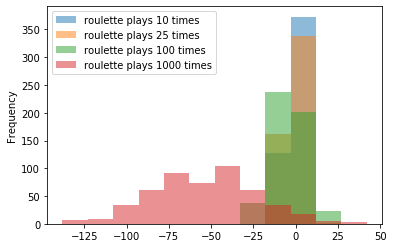

In [4]:
res = res.T
res.columns = ['roulette plays 10 times','roulette plays 25 times','roulette plays 100 times','roulette plays 1000 times']
res.plot.hist(bins=12, alpha=0.5)

##### Grading Feedback Cell

Your explanation here:<br>  

As the number of plays increases,the players are more likly losing the money. The distribution is normalized. 

##### Grading Feedback Cell

# Question 3 (10 pts)
Using the central limit theorem, create a pandas dataframe named roulette_df containing the sampling distribution of the means from the sample data in the numpy array above.  The pandas dataframe should have 4 columns labeled with the simulation names. Using data in the roulette_df, plot histograms for each of the sampling distributions - you should have 4 histograms in total.<br>  Assuming you don't know the underlying distribution of the population from which the samples were drawn, some of the histograms are gauranteed to be Gaussian in shape, some are not gauranteed, and some are in a transition region. For each of the 4 simulations, describe if you think the shape is gauranteed to be gaussian, not gauranteed to be Gaussian, or in a transition area between a gaurantee and no gaurantee.

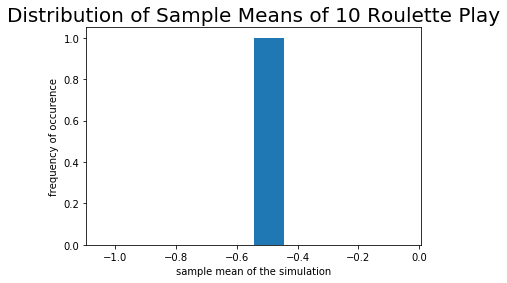

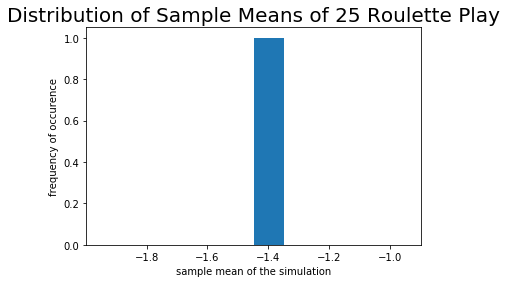

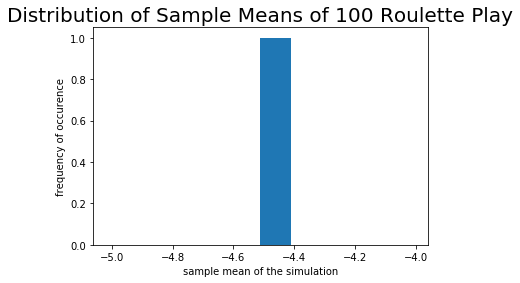

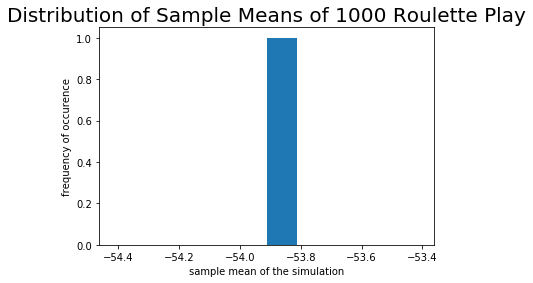

In [5]:
import seaborn as sns
# Your histogram code here
ans = roulette_sim_array.mean(axis=1)
p1 = ans[0]
p2 = ans[1]
p3 = ans[2]
p4 = ans[3]
roulette_df = pd.DataFrame({'roulette plays 10 times':[p1],'roulette plays 25 times':[p2],'roulette plays 100 times':[p3],'roulette plays 1000 times':[p4]})

plt.hist(roulette_df['roulette plays 10 times'])
plt.title("Distribution of Sample Means of 10 Roulette Play", fontsize=20)
plt.xlabel("sample mean of the simulation",)
plt.ylabel("frequency of occurence");
plt.show()

plt.hist(roulette_df['roulette plays 25 times'])
plt.title("Distribution of Sample Means of 25 Roulette Play", fontsize=20)
plt.xlabel("sample mean of the simulation",)
plt.ylabel("frequency of occurence");
plt.show()

plt.hist(roulette_df['roulette plays 100 times'])
plt.title("Distribution of Sample Means of 100 Roulette Play", fontsize=20)
plt.xlabel("sample mean of the simulation",)
plt.ylabel("frequency of occurence");
plt.show()

plt.hist(roulette_df['roulette plays 1000 times'])
plt.title("Distribution of Sample Means of 1000 Roulette Play", fontsize=20)
plt.xlabel("sample mean of the simulation",)
plt.ylabel("frequency of occurence");
plt.show()

In [ ]:
# Grading cell - do not modify
roulette_df.head()

##### Grading Feedback Cell

Your explanation here:<br>

The distribution is gauranteed to be gaussian (or more precisely binomial distribution)

##### Grading Feedback Cell

# Question 4 (20 pts)
Create a new monte carlo simulation that calculates the probability that the casino loses money based on the number of times that a player plays roulette.  Create a function p_casino_loss that takes as an argument the number of times that the player plays roulette, and returns the probability that the casino loses money.  Using data collected from p_casino_loss, produce a line plot that shows the probability that the casino loses money vs. the number of games played for number of games between 25 and 1000.  Describe what the results of the simulation show.

In [9]:
import random 
#the probability that the casino loses money.
def factorial(n): 
    return 1 if (n==1 or n==0) else n * factorial(n - 1)
def helper(x, num, win_prob):
    combination = factorial(num) / (factorial(x) * factorial(num-x))
    p = (win_prob ** x) * ((1 - win_prob)** (num - x))
    return p * combination
    

def p_casino_loss(num):
    loss = 0
    half = int(num / 2 + 1)
    win_prob = 9 / 19
    for x in range(half, num + 1):
        loss += helper(x, num, win_prob)
   
    return loss
loss = []

loss.append(p_casino_loss(25))
loss.append(p_casino_loss(1000))

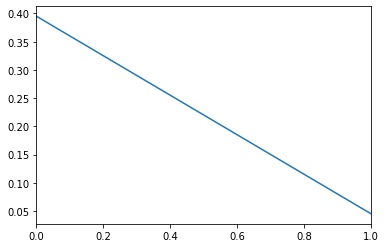

In [14]:
x = pd.Series(loss)
x.plot.line()


Your explanation here:<br>

As the number of times game played, the cascino becomes less likely to loss money

##### Grading Feedback Cell

# Question 5 (10 pts)
Compute the following matrix dot product manually by creating 2 dimensinal nympy arrays for each matrix, computing the matrix multiply using for loops, and loading a new 2 dimensional numpy array with the answer.  Print the resulting numpy array.

$$
\quad
\begin{bmatrix} 
3 & 7 \\
6 & 9 \\
4 & 2 \\
\end{bmatrix}
\quad
*
\quad
\begin{bmatrix} 
2 & 5 & 7\\
2 & 5 & 1
\end{bmatrix}
\quad
$$

In [22]:
x = [[3,7],[6,9],[4,2]]
y = [[2,5,7],[2,5,1]]
res = [[0,0,0],[0,0,0],[0,0,0]]
for i in range(len(x)):
    for j in range(len(y[0])):
        for k in range(len(y)):
            res[i][j] += x[i][k]*y[k][j]

for r in res:
    print(r)





[20, 50, 28]
[30, 75, 51]
[12, 30, 30]


##### Grading Feedback Cell

# Question 6 (10 pts)
Read each of the csv files in your assignment repo into pandas dataframes named population_df, morttality_df, life_exp_df, and fertility_df.  Rename the column with the country names as "Country" in each of the dataframes.

In [6]:
# your code here
import pandas as pd
population_df = pd.read_csv('./indicator gapminder population - Data.csv')
population_df = population_df.rename(columns={'Total population':'Country'})

morttality_df = pd.read_csv('./indicator gapminder under5mortality - Data.csv')
morttality_df = morttality_df.rename(columns={'Under five mortality':'Country'})

life_exp_df = pd.read_csv('./indicator life_expectancy_at_birth - Data.csv')
life_exp_df = life_exp_df.rename(columns={'Life expectancy with projections. Yellow is IHME':'Country'})

fertility_df = pd.read_csv('./indicator undata total_fertility - Data.csv')
fertility_df = fertility_df.rename(columns={'Total fertility rate':'Country'})



In [15]:
def display(df):
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    print(df)
    

In [16]:
# grading cell - do not modify
display(population_df)
display(morttality_df)
display(life_exp_df)
display(fertility_df)

                                          Country         1800       1810  \
0                                        Abkhazia          NaN        NaN   
1                                     Afghanistan      3280000    3280000   
2                           Akrotiri and Dhekelia          NaN        NaN   
3                                         Albania      410,445     423591   
4                                         Algeria    2,503,218    2595056   
5                                  American Samoa        8,170       8156   
6                                         Andorra         2654       2654   
7                                          Angola      1567028    1567028   
8                                        Anguilla         2025       2025   
9                             Antigua and Barbuda        37000      37000   
10                                      Argentina       534000     534000   
11                                        Armenia       413326     413326   

                                          Country    1800    1801    1802  \
0                                        Abkhazia     NaN     NaN     NaN   
1                                     Afghanistan  468.58  468.58  468.58   
2                           Akrotiri and Dhekelia     NaN     NaN     NaN   
3                                         Albania  375.20  375.20  375.20   
4                                         Algeria  460.21  460.21  460.21   
5                                  American Samoa     NaN     NaN     NaN   
6                                         Andorra     NaN     NaN     NaN   
7                                          Angola  485.68  485.68  485.68   
8                                        Anguilla     NaN     NaN     NaN   
9                             Antigua and Barbuda  473.60  469.77  465.97   
10                                      Argentina  402.19  402.19  402.19   
11                                        Armenia  371.20  370.71  370.23   

                            Country       1800       1801       1802  \
0                          Abkhazia        NaN        NaN        NaN   
1                       Afghanistan  28.211000  28.200753  28.190507   
2             Akrotiri and Dhekelia        NaN        NaN        NaN   
3                           Albania  35.400000  35.400000  35.400000   
4                           Algeria  28.822400  28.822400  28.822400   
5                    American Samoa        NaN        NaN        NaN   
6                           Andorra        NaN        NaN        NaN   
7                            Angola  26.980000  26.980000  26.980000   
8                          Anguilla        NaN        NaN        NaN   
9               Antigua and Barbuda  33.536000  33.536000  33.536000   
10                        Argentina  33.200000  33.200000  33.200000   
11                          Armenia  33.995000  33.995000  33.995000   
12                            Aruba  34.419000  34.419000  34.41

                            Country  1800  1801  1802  1803  1804  1805  1806  \
0                          Abkhazia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1                       Afghanistan  7.00  7.00  7.00  7.00  7.00  7.00  7.00   
2             Akrotiri and Dhekelia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3                           Albania  4.60  4.60  4.60  4.60  4.60  4.60  4.60   
4                           Algeria  6.99  6.99  6.99  6.99  6.99  6.99  6.99   
5                    American Samoa   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6                           Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7                            Angola  6.93  6.93  6.93  6.93  6.93  6.93  6.93   
8                          Anguilla   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
9               Antigua and Barbuda  5.00  5.00  4.99  4.99  4.99  4.98  4.98   
10                        Argentina  6.80  6.80  6.80  6.80  6.80  6.80  6.80   
11                          

##### Grading Feedback Cell

# Question 7 (10 pts)
The data frames from the question above are organized such that rows are countries and columns are years.  Reorganize each data frame such that each row contains 3 columns: country, year, and a data value.  This is known as the long or tidy format.  For example, the population data frame columns start out as country, year, year, year, ..., year.  After reorganizing, the population data frame columns will contain only 3 columns: country, year, and population.  Save the reorganized data into new data frames named tidy_population_df, tidy_morttality_df, tidy_life_exp_df, and tidy_fertility_df.  You are free to use any means necessary to perform this task but the pandas melt function may be useful.

In [17]:

tidy_population_df = pd.melt(population_df,['Country'],var_name=['Year'],value_name="population")
tidy_morttality_df = pd.melt(morttality_df,['Country'],var_name=['Year'],value_name="mortality")
tidy_life_exp_df = pd.melt(life_exp_df,['Country'],var_name=['Year'],value_name="life expentency")
tidy_fertility_df =  pd.melt(fertility_df,['Country'],var_name=['Year'],value_name="fertility")

In [18]:
# grading cell - do not modify
#display(tidy_population_df)
print(tidy_population_df.size)
#display(tidy_morttality_df)
print(tidy_morttality_df.size)
#display(tidy_life_exp_df)
print(tidy_life_exp_df.size)
#display(tidy_fertility_df)
print(tidy_fertility_df.size)

66825
178200
168480
168480


##### Grading Feedback Cell

# Question 8 (10 pts)
Join all 4 dataframes together such that the country, year, population, mortality, life expectancy, and fertility columns are collected together in the same dataframe.  The join operation should not throw away any data.  Name the new dataframe concat_df.  Next, delete all rows where the data values (values other than country and year) are all NaN values.  Only drop the row if ALL the data values are NaN.

In [19]:
# your code here
frames = [tidy_population_df,tidy_morttality_df,tidy_life_exp_df,tidy_fertility_df]
from functools import reduce
concat_df = reduce(lambda  left,right: pd.merge(left,right,on=['Country', 'Year'],
                                            how='outer'), frames)

In [20]:
concat_df= concat_df.dropna(subset=['population','mortality','life expentency','fertility'],how='all')
concat_df.head(30)

,Country,Year,population,mortality,life expentency,fertility
1,Afghanistan,1800,3280000,468.58,28.2110,7.00
3,Albania,1800,"410,445",375.20,35.4000,4.60
4,Algeria,1800,"2,503,218",460.21,28.8224,6.99
5,American Samoa,1800,"8,170",NaN,NaN,NaN
6,Andorra,1800,2654,NaN,NaN,NaN
7,Angola,1800,1567028,485.68,26.9800,6.93
8,Anguilla,1800,2025,NaN,NaN,NaN
9,Antigua and Barbuda,1800,37000,473.60,33.5360,5.00
10,Argentina,1800,534000,402.19,33.2000,6.80
11,Armenia,1800,413326,371.20,33.9950,7.80


In [ ]:
# grading cell - do not modify
display(concat_df.head())
print(concat_df.shape)

##### Grading Feedback Cell

# Question 9 (10 pts)
Using concat_df, report the child mortality rate and life expectancy in in 2015 for these 5 countries:
1. Sri Lanka
2. Poland
3. Malaysia
4. Pakistan
5. Thailand

In [21]:
 
temp = concat_df.iloc[:,[0,1,4,5]]
d1 = temp.loc[(temp['Year'] == '2015') & (temp['Country'] == 'Sri Lanka')]
d2 = temp.loc[(temp['Year'] == '2015') & (temp['Country'] == 'Poland')]
d3 = temp.loc[(temp['Year'] == '2015') & (temp['Country'] == 'Malaysia')]
d4 = temp.loc[(temp['Year'] == '2015') & (temp['Country'] == 'Pakistan')]
d5 = temp.loc[(temp['Year'] == '2015') & (temp['Country'] == 'Thailand')]

print(d1)
print(d2)
print(d3)
print(d4)
print(d5)



         Country  Year  life expentency  fertility
22293  Sri Lanka  2015             76.5       2.31
      Country  Year  life expentency  fertility
22259  Poland  2015             77.3       1.44
        Country  Year  life expentency  fertility
22215  Malaysia  2015             75.1       1.94
        Country  Year  life expentency  fertility
22251  Pakistan  2015             66.5       3.04
        Country  Year  life expentency  fertility
22304  Thailand  2015             75.1       1.38


##### Grading Feedback Cell